In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Import the csv dataset from
df = pd.read_csv(r'C:\Users\Sandy\Desktop\Python\diabetes.csv', keep_default_na=True, na_values=['?'])

In [3]:
X,Y=df.iloc[:,:-1], df.iloc[:,-1]
for x in (df, X):
    print(x.shape)
    print(x.columns)

(768, 9)
Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')
(768, 8)
Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age'],
      dtype='object')


In [4]:
#Visualize and explore
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B898E10>,
      dtype=object)

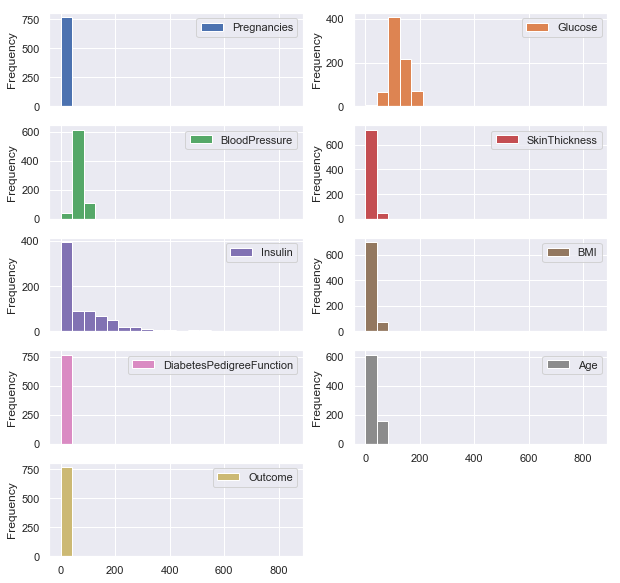

In [6]:
#Visualize and explore
df.plot.hist(subplots=True, layout=(5,2), figsize=(10, 10), bins=20)

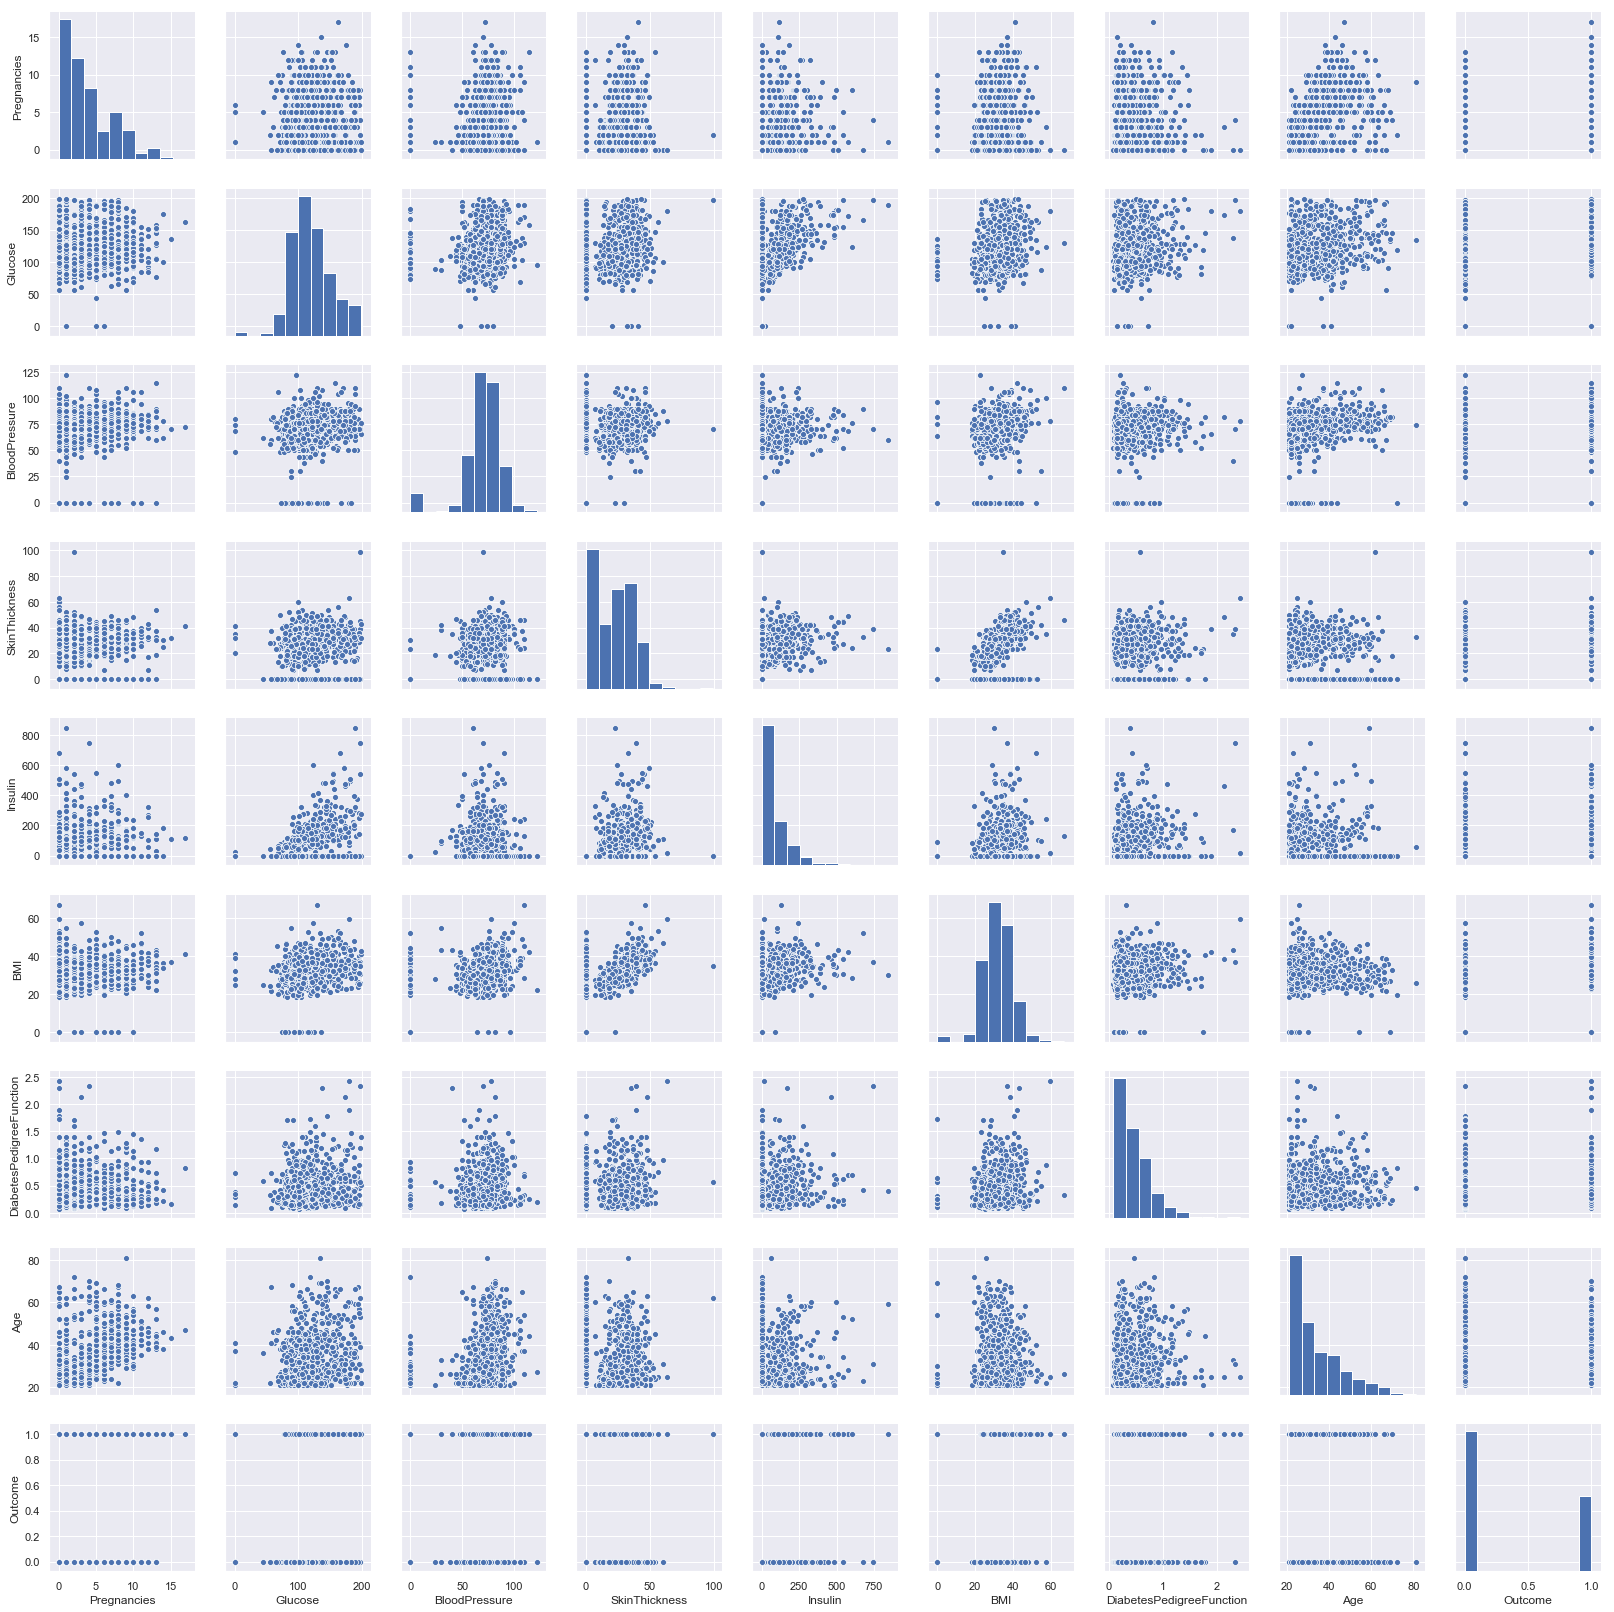

In [7]:
#Visualize and explore
sns.pairplot(df)

In [8]:
#Split the data into training (to learn hypotheses) and testing set (to obtain accurcy)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

print(X_test.shape)
print(Y_test.shape)

(192, 8)
(192L,)


In [9]:
#Train with Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Create a Gaussian Classifier
model = LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

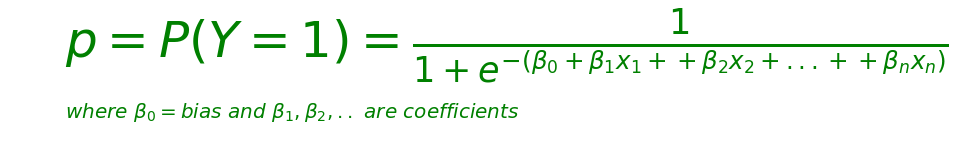

In [10]:
#Print Logistic Regression formula
def show_formula (formulat_in_latex, note):
    #a = r'f(x) = \frac{\exp(-x^2/2)}{\sqrt{2*\pi}}'
    #note=r'where\  {\beta_0} = bias \  and \  {\beta_1,\beta_2,..} \ are \ coefficients'
    ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.4,0.9,'$%s$' %formulat_in_latex,size=50,color="green")
    if note :
        plt.text(0.4,0.2,'$%s$' %note,size=20,color="green")
    
logit_formula_in_latex=r'p = P(Y=1) = \frac{1}{1+e^{-(\beta_0 + \beta_1x_1 + + \beta_2x_2 + ... + + \beta_nx_n)}}'
note=r'where\  {\beta_0} = bias \  and \  {\beta_1,\beta_2,..} \ are \ coefficients'
show_formula (logit_formula_in_latex, note)

In [11]:
#Print model parameters
parameters = model.coef_
line="----------------------------------------------------"

print("{:<30} {}\n{}\n\n".format("Bias:", str(model.intercept_[0]), line ) )

#Apply little formatting
print("{:^15} {:^50}\n{}".format("Features", "Coefficients", line ) )

for feature_name, coef in zip(X_train.columns.values.tolist(),parameters[0]) : #X_train.columns.tolist():
    if coef >= 0.0 :
        print("{:<30} {}".format(feature_name, str(coef) ) )
    else:
        print("{:<29} {}".format(feature_name, str(coef) ) )
        
#print(model.get_params(deep=True))

Bias:                          -5.4502100090058745
----------------------------------------------------


   Features                        Coefficients                   
----------------------------------------------------
Pregnancies                    0.0834426847571429
Glucose                        0.025556893496607242
BloodPressure                 -0.016491141771249135
SkinThickness                  0.005594888551824355
Insulin                       -0.0005374195881557724
BMI                            0.0542852088907112
DiabetesPedigreeFunction       0.6010646594932841
Age                            0.01235500379807171


In [12]:
#Nice way to verify
# import statsmodels.api as sm
# logit_model=sm.Logit(Y_train,X_train)
# result=logit_model.fit()
# print(result.summary2())

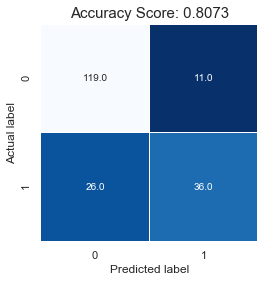

In [13]:
#Compute Accuracy and Cofusion Matrix
score=metrics.accuracy_score(Y_test, Y_pred)

TARGET_COLUMN='Outcome'
cm=metrics.confusion_matrix(Y_test,Y_pred)
target_labels=sorted(df[TARGET_COLUMN].unique())
#print(target_labels)
df_cm = pd.DataFrame(cm, index=target_labels, columns=target_labels)


plt.figure(figsize=(4,4))
sns.heatmap(df_cm, annot=True, fmt=".1f", linewidths=.5, square = True, cbar=False, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(score)
plt.title(all_sample_title, size = 15);

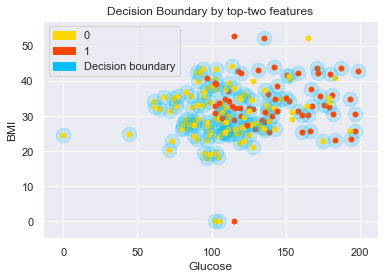

In [14]:
#Decision boundary 
from sklearn.ensemble import RandomForestClassifier

def get_top_n_feature (X_data,Y_data, n):
    #Create a Gaussian Classifier
    rfc=RandomForestClassifier(n_estimators=100)
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    rfc.fit(X_data,Y_data)
    
    feature_imp = pd.Series(rfc.feature_importances_,index=X_data.columns).sort_values(ascending=False)
    #print(feature_imp[:2*n])
    top_n_features=feature_imp.index[:n]
    #print(top_n_features)
    return top_n_features
    #function ends

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_decision_boundary (feature_data, top_2_features, label_data, label_data_pred):
    target_labels=sorted(label_data.unique()) #assumed binary lebels
    y1_color='gold'  #'blue'
    y2_color='orangered'
    boundary_color='deepskyblue'
    PLOT_TITLE='Decision Boundary by top-two features'

    x1 = feature_data[top_2_features[0]]  
    x2 = feature_data[top_2_features[1]] 
    y =  label_data
    y_pred = label_data_pred
    
    # For testing used 10000 iterations only, need to change it during Prod run 
    indx=300000
    for x1, x2, y, y_pred in zip(x1,x2,y, y_pred):
        indx=indx-1
        if indx == 0:
            break
        
        c=y1_color  
        if y==target_labels[1]:
            c=y2_color  
      
        
        if y==y_pred:
            plt.scatter(x1, x2, color=boundary_color, label=y, alpha=0.2, s=208)
    
        plt.scatter(x1, x2, color=c, label=y, alpha=1, s=24)
        
    #End of plotting main data
    
    plt.title(PLOT_TITLE)
    
    #Make Legend
    red_patch = mpatches.Patch(color=y1_color, label=target_labels[0])
    red1_patch = mpatches.Patch(color=y2_color, label=target_labels[1])
    red2_patch = mpatches.Patch(color=boundary_color, label='Decision boundary') #TODO can we make a line legend


    plt.legend(handles=[red_patch,red1_patch,red2_patch], loc='best')

    plt.xlabel(top_2_features[0])
    plt.ylabel(top_2_features[1])
    plt.show()
    #function ends

    
top_2_features=get_top_n_feature(X_train,Y_train, 2)
plot_decision_boundary(X_test,top_2_features,Y_test, Y_pred )

In [15]:
#Identify which of the following variables are positively associated with the target column. 
from scipy.stats import pearsonr

# calculate Pearson's correlation
print('Pearsons correlation: (+ve or -ve association)')
print("-----------------------------------")
for col in X_train.columns.values.tolist():
    corr, _ = pearsonr(X_test[col], Y_test)
    #print(col+': Pearsons correlation: %.3f' % corr)
    if corr>=0:
        print("{:<30} {:.3f}".format(col, corr ) )
    else:
        print("{:<29} {:.3f}".format(col+"(-ve)", corr ) )
    
# plt.scatter(X_test['Age'], Y_test)
# plt.show()
# plt.scatter(X_test['BloodPressure'], Y_test)
# plt.show()

Pearsons correlation: (+ve or -ve association)
-----------------------------------
Pregnancies                    0.323
Glucose                        0.494
BloodPressure                  0.004
SkinThickness(-ve)            -0.053
Insulin                        0.088
BMI                            0.243
DiabetesPedigreeFunction       0.194
Age                            0.213


In [16]:
#Columns: 
# ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
#target_X =[[2,0,0,0,0,24,0,35],[2,0,0,0,0,35,0,35],[1.0, 199.0, 76.0, 43.0, 0.0, 42.9, 1.3, 22.0]]
target_X =[[2,0,0,0,0,24,0,35],[2,0,0,0,0,35,0,35]]
target_X_amputed=[[2,df.loc[:,"Glucose"].median(),df.loc[:,"BloodPressure"].median(),df.loc[:,"SkinThickness"].median(),
                       df.loc[:,"Insulin"].median(),24,df.loc[:,"DiabetesPedigreeFunction"].median(),35],
                     [2,df.loc[:,"Glucose"].median(),df.loc[:,"BloodPressure"].median(),df.loc[:,"SkinThickness"].median(),
                       df.loc[:,"Insulin"].median(),35,df.loc[:,"DiabetesPedigreeFunction"].median(),35]]
# Create the pandas DataFrame 
target_X_df = pd.DataFrame(target_X, columns = X_test.columns) 
Y_pred_1 = model.predict(target_X_df)

target_X_amputed_df = pd.DataFrame(target_X_amputed, columns = X_test.columns) 
Y_pred_2 = model.predict(target_X_amputed_df)

print("Prediction for a woman aged 35 and mother of 2 children:")
print("when  {:<10} Class (without amputation)= {}  (with amputation) = {}".format("BMI=24", str(Y_pred_1[0]),str(Y_pred_2[0]) ))
print("      {:<10} Class (without amputation)= {}  (with amputation) = {}".format("BMI=35", str(Y_pred_1[1]),str(Y_pred_2[1]) ))

Prediction for a woman aged 35 and mother of 2 children:
when  BMI=24     Class (without amputation)= 0  (with amputation) = 0
      BMI=35     Class (without amputation)= 0  (with amputation) = 0
